# Sentiment Analysis on Fascist Reddit with Python’s Natural Language Toolkit (NLTK)

In [2]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [3]:
from apikeys import reddit_client_id, reddit_client_secret, reddit_user_agent
import praw

reddit = praw.Reddit(client_id=reddit_client_id,
                     client_secret=reddit_client_secret,
                     user_agent=reddit_user_agent)

Version 7.3.0 of praw is outdated. Version 7.4.0 was released Friday July 30, 2021.


In [4]:
headlines = set()
sub_set = {'ParlerWatch', 'CapitolConsequences', 'QAnonCasualties'}

In [5]:
for item in sub_set:
    for submission in reddit.subreddit(item).new(limit=None):
        headlines.add(submission.title)
        display.clear_output()
        print(len(headlines))

2963


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:7], width=100)

[{'compound': 0.0,
  'headline': 'Found this on Twitter regarding the Texas and Arizona call to the border. Anyone '
              'else seeing this narrative being spun?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0, 'headline': 'There goes the neighborhood…', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.4939, 'headline': 'Scary', 'neg': 1.0, 'neu': 0.0, 'pos': 0.0},
 {'compound': 0.0258,
  'headline': 'Last weekend the neo-Nazi group Nationalist Social Club (NSC) held a tiny White '
              'Lives Matter flash rally in Boston, Massachusetts.',
  'neg': 0.0,
  'neu': 0.942,
  'pos': 0.058},
 {'compound': -0.3612,
  'headline': 'He brought a sawed-off rifle to the Capitol on Jan. 6. Then he plotted to bomb '
              'Amazon data centers.',
  'neg': 0.153,
  'neu': 0.766,
  'pos': 0.081},
 {'compound': -0.5574,
  'headline': "Tech groups urge Congress to 'dig deeper' on Facebook role in Capitol riot",
  'neg': 0.231,
  'neu': 0.769,
  'pos': 0.0},
 

In [7]:
df = pd.DataFrame.from_records(results)
df.head(n=7)

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Found this on Twitter regarding the Texas and ...
1,0.000,1.000,0.000,0.0000,There goes the neighborhood…
2,1.000,0.000,0.000,-0.4939,Scary
3,0.000,0.942,0.058,0.0258,Last weekend the neo-Nazi group Nationalist So...
4,0.153,0.766,0.081,-0.3612,He brought a sawed-off rifle to the Capitol on...
5,0.231,0.769,0.000,-0.5574,Tech groups urge Congress to 'dig deeper' on F...
6,0.270,0.449,0.281,0.0258,Sometimes I feel like the crazy one.


In [8]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head(n=7)

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Found this on Twitter regarding the Texas and ...,0
1,0.000,1.000,0.000,0.0000,There goes the neighborhood…,0
2,1.000,0.000,0.000,-0.4939,Scary,-1
3,0.000,0.942,0.058,0.0258,Last weekend the neo-Nazi group Nationalist So...,0
4,0.153,0.766,0.081,-0.3612,He brought a sawed-off rifle to the Capitol on...,-1
5,0.231,0.769,0.000,-0.5574,Tech groups urge Congress to 'dig deeper' on F...,-1
6,0.270,0.449,0.281,0.0258,Sometimes I feel like the crazy one.,0


In [9]:
df2 = df[['headline', 'label']]

In [10]:
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [11]:
df.label.value_counts()

 0    1233
-1    1219
 1     511
Name: label, dtype: int64

In [12]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:7], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:7], width=200)

Positive headlines:

["Judge slaps down QAnon shaman's latest attempt to win a pretrial release",
 'Managed to convince my Qmom to wear a mask!',
 'Idk what to trust anymore.',
 'Comment on a video that had nothing to do with politics. And of course 7 people liked it.',
 'Antivax be like: don’t believe everything you read about covid!Also antivax:',
 '[Small update] I survived the Stoneman Douglas school shooting',
 'Help finding a post like this: "Can she cook? Can she clean? Watch her babysit for 2 hours" Or something along those lines. People on a .win sight discussing what to look for in a woman.']

Negative headlines:

['Scary',
 'He brought a sawed-off rifle to the Capitol on Jan. 6. Then he plotted to bomb Amazon data centers.',
 "Tech groups urge Congress to 'dig deeper' on Facebook role in Capitol riot",
 "Cheney calls select committee 'our only remaining option' and attacks GOP leaders for appeasing Trump",
 'Conspiracy Thinking Research Survey - Participants Required',
 'Tru

In [13]:
df.label.value_counts(normalize=True) * 100

 0    41.613230
-1    41.140736
 1    17.246034
Name: label, dtype: float64

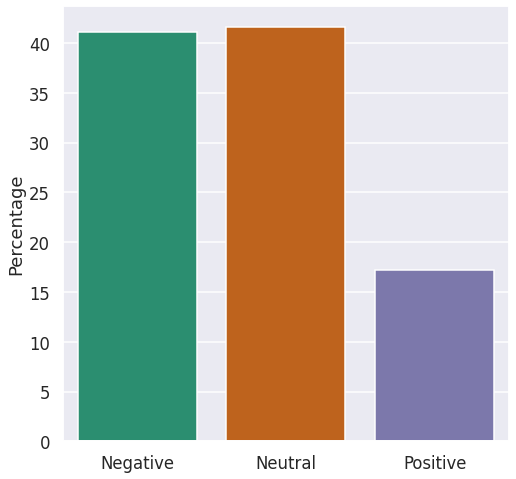

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [15]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [16]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['This', 'is', 'an', 'example', 'sentence', 'However', 'it', 'isn', 't', 'a', 'very', 'informative', 'one']


In [17]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [18]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [19]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('like', 51),
 ('6', 50),
 ('q', 46),
 ('trump', 45),
 ('capitol', 40),
 ('jan', 36),
 ('help', 33),
 ('please', 33),
 ('people', 29),
 ('fbi', 27),
 ('get', 23),
 ('friend', 21),
 ('qanon', 19),
 ('post', 18),
 ('would', 18),
 ('proud', 18),
 ('vaccine', 18),
 ('support', 16),
 ('new', 16),
 ('right', 16)]

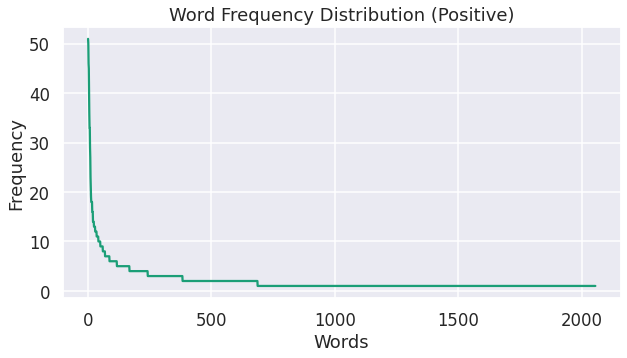

In [20]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

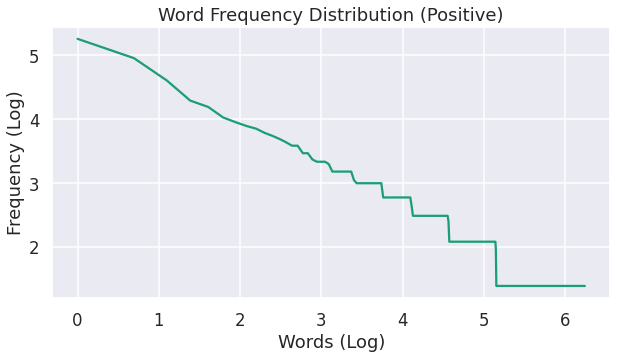

In [21]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [22]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('capitol', 400),
 ('riot', 236),
 ('6', 179),
 ('jan', 141),
 ('trump', 104),
 ('q', 83),
 ('man', 79),
 ('charged', 65),
 ('arrested', 63),
 ('fbi', 62),
 ('attack', 58),
 ('conspiracy', 55),
 ('police', 52),
 ('people', 50),
 ('u', 49),
 ('new', 44),
 ('says', 41),
 ('us', 40),
 ('rioter', 39),
 ('insurrection', 39)]

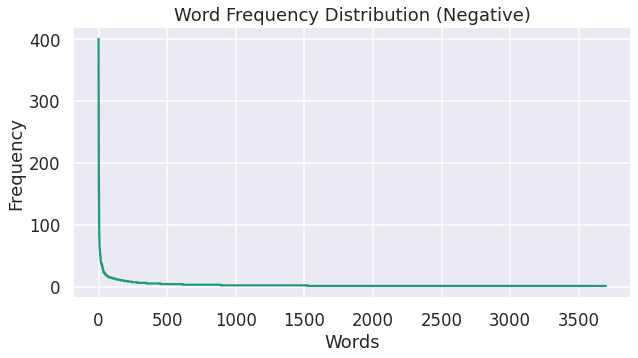

In [23]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

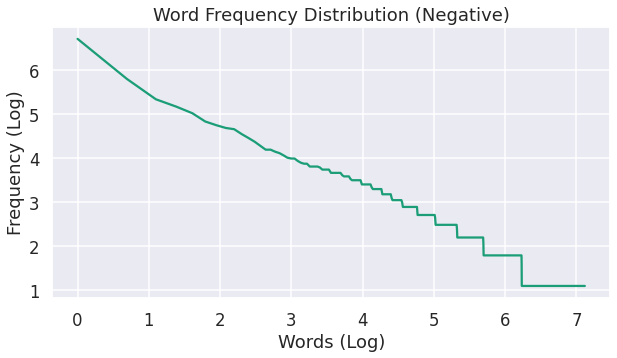

In [24]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()